# Random Forest and Logistic Model trees Methods on APS Failure Data

### Sitao Min

## a. Data Processing

In [24]:
import pandas as pd
import numpy as np
import glob

In [25]:
from sklearn.preprocessing import Imputer

In [46]:
training_file_name = "./aps_failure_training_set.csv"
test_file_name = "./aps_failure_test_set.csv"

reading_training_file = glob.glob(training_file_name)[0]
training_data_frame = pd.read_csv(reading_training_file,header=0)
test_training_file = glob.glob(test_file_name)[0]
test_data_frame = pd.read_csv(test_training_file,header=0)

In [45]:
def imputer_x_data_process(df):
    for col in df.columns:
        temp = df[col]
        for row in range(temp.size):
            if temp.values[row] != "na":
                temp.values[row] = float (temp.values[row])
            else:
                temp.values[row] = np.nan

    fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=0)
    imputed_data_all = pd.DataFrame(fill_NaN.fit_transform(df))
    imputed_data_all.columns = df.columns
    imputed_data_all.index = df.index
    return imputed_data_all

def imputer_y_data_process(df):
    for row in range(df.size):
        if df.values[row] == "neg":
            df.values[row] = 0
        else:
            df.values[row] = 1
    return df

### Read data, using median of the feature when facing missing data

In [47]:
training_data_y = imputer_y_data_process(training_data_frame["class"])
test_data_y = imputer_y_data_process(test_data_frame["class"])
training_data_x = imputer_x_data_process(training_data_frame.drop(columns=["class"]))
test_data_x = imputer_x_data_process(test_data_frame.drop(columns=["class"]))

In [6]:
training_data_x

aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0       76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1       33058.0     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
2       41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3          12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4       60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
5       38312.0     0.0  2.130706e+09   218.0     0.0     0.0     0.0     0.0   
6          14.0     0.0  6.000000e+00   126.0     0.0     0.0     0.0     0.0   
7      102960.0     0.0  2.130706e+09   116.0     0.0     0.0     0.0     0.0   
8       78696.0     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
9      153204.0     0.0  1.820000e+02   126.0     0.0     0.0     0.0     0.0   
10      39196.0     0.0  2.040000e+02   170.0     0.0     0.0     0.0     0.0   
11      45912.0     0.0  0.000000e+00   454.0     0.0     0.0     0.0     0.0   
12       2104.0     0.0  3.600000e+01    26.0     0.0     0.0     0.0     0.0   
13     118950.0     0.0  1.390000e+03  1298.0     0.0     0.0     0.0     0.0   
14      24416.0     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
15         14.0     0.0  6.200000e+01    34.0     0.0     0.0     0.0     0.0   
16      31300.0     0.0  7.840000e+02   740.0     0.0     0.0     0.0     0.0   
17        736.0     2.0  2.400000e+01    22.0    16.0    20.0     0.0     0.0   
18        332.0     0.0  2.130706e+09    20.0     0.0     0.0     0.0     0.0   
19       1432.0     0.0  2.130706e+09    82.0     0.0     0.0     0.0     0.0   
20      41212.0     0.0  2.130706e+09   104.0   104.0   172.0     0.0     0.0   
21         14.0     0.0  6.000000e+00     6.0     0.0     0.0     0.0     0.0   
22     157128.0     0.0  2.130706e+09   424.0     0.0     0.0     0.0     0.0   
23     453236.0     0.0  2.926000e+03   126.0     0.0     0.0     0.0     0.0   
24      58246.0     0.0  2.130706e+09  2416.0     0.0     0.0     0.0     0.0   
25      29394.0     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
26       8690.0     0.0  4.760000e+02   364.0     0.0     0.0     0.0     0.0   
27      46978.0     0.0  3.340000e+02   322.0     0.0     0.0     0.0     0.0   
28       1870.0     0.0  1.520000e+02   126.0     0.0     0.0     0.0     0.0   
29      12516.0     0.0  1.200000e+02   126.0     0.0     0.0     0.0     0.0   
...         ...     ...           ...     ...     ...     ...     ...     ...   
59970      16.0     0.0  8.000000e+00   126.0     0.0     0.0     0.0     0.0   
59971   39026.0     0.0  2.020000e+02   168.0     0.0     0.0     0.0     0.0   
59972      14.0     0.0  2.400000e+01    20.0     0.0     0.0     0.0     0.0   
59973    3248.0     8.0  1.600000e+01    10.0     0.0     0.0     0.0     0.0   
59974   83818.0     0.0  5.520000e+02   532.0     0.0     0.0     0.0     0.0   
59975   40274.0     0.0  9.800000e+01    94.0     0.0     0.0     0.0     0.0   
59976   16978.0     0.0  2.130706e+09  1750.0     0.0     0.0     0.0     0.0   
59977   30320.0     0.0  1.838000e+03  1278.0     0.0     0.0     0.0     0.0   
59978   38414.0     0.0  8.880000e+02   758.0     0.0     0.0     0.0     0.0   
59979      18.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0     0.0   
59980     562.0     0.0  4.000000e+00     4.0     0.0     0.0     0.0     0.0   
59981      16.0     0.0  2.000000e+01    20.0     0.0     0.0     0.0     0.0   
59982   10628.0     0.0  2.130706e+09    98.0     0.0     0.0     0.0     0.0   
59983   39004.0     0.0  9.000000e+01    84.0     0.0     0.0     0.0     0.0   
59984   33386.0     0.0  8.120000e+02   744.0     0.0     0.0     0.0     0.0   
59985   10792.0     0.0  7.840000e+02   608.0     0.0     0.0     0.0     0.0   
59986     644.0     0.0  1.200000e+01   126.0     0.0     0.0     0.0     0.0   
59987   41330.0     0.0  2.130706e+09   

In [41]:
training_data_y

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9         1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23        1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
59970    -1
59971    -1
59972    -1
59973    -1
59974    -1
59975    -1
59976    -1
59977    -1
59978    -1
59979    -1
59980    -1
59981    -1
59982    -1
59983    -1
59984    -1
59985    -1
59986    -1
59987    -1
59988    -1
59989    -1
59990    -1
59991    -1
59992    -1
59993    -1
59994    -1
59995    -1
59996    -1
59997    -1
59998    -1
59999    -1
Name: class, Length: 60000, dtype: object

In [8]:
test_data_x

aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0           60.0     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1           82.0     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2        66002.0     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3        59816.0     0.0  1.010000e+03   936.0     0.0     0.0     0.0   
4         1814.0     0.0  1.560000e+02   140.0     0.0     0.0     0.0   
5          174.0     0.0  2.600000e+01    24.0     0.0     0.0     0.0   
6        40202.0     0.0  6.400000e+02   606.0     0.0     0.0     0.0   
7       120278.0     0.0  2.130706e+09   256.0     0.0     0.0     0.0   
8        14592.0     0.0  2.130706e+09   162.0     0.0     0.0     0.0   
9        28338.0     0.0  2.130706e+09   238.0     0.0     0.0     0.0   
10       30758.0     0.0  4.500000e+02   402.0     0.0     0.0     0.0   
11       40358.0     0.0  1.672000e+03  1378.0     0.0     0.0     0.0   
12       33072.0     0.0  1.590000e+02   130.0     0.0     0.0     0.0   
13       30664.0     0.0  5.300000e+02   514.0     0.0     0.0     0.0   
14       41628.0     0.0  2.130706e+09   380.0     0.0     0.0     0.0   
15        1204.0     0.0  2.130706e+09   130.0     0.0     0.0     0.0   
16        1434.0     0.0  3.200000e+01    26.0     0.0     0.0     0.0   
17       31576.0     0.0  3.780000e+02   350.0     0.0     0.0     0.0   
18       30812.0     0.0  2.130706e+09   144.0     0.0     0.0     0.0   
19         846.0     0.0  1.000000e+02    52.0     0.0     0.0     0.0   
20       42676.0     0.0  6.960000e+02   548.0     0.0     0.0     0.0   
21          30.0     0.0  3.400000e+01    32.0     0.0     0.0     0.0   
22      121576.0     0.0  1.218000e+03   130.0     0.0     0.0     0.0   
23       24272.0     0.0  1.760000e+02   168.0     0.0     0.0     0.0   
24       98470.0     0.0  2.130706e+09   284.0     0.0     0.0     0.0   
25         970.0     0.0  2.130706e+09    52.0     0.0     0.0     0.0   
26           8.0     0.0  1.000000e+01    10.0     0.0     0.0     0.0   
27       63496.0     0.0  1.094000e+03     0.0     0.0     0.0     0.0   
28         844.0     0.0  2.600000e+01    26.0     0.0     0.0     0.0   
29       32200.0     0.0  5.640000e+02     0.0     0.0     0.0     0.0   
...          ...     ...           ...     ...     ...     ...     ...   
15970    41416.0     0.0  1.020000e+02    98.0     0.0     0.0     0.0   
15971    30346.0     0.0  0.000000e+00   130.0     0.0     0.0     0.0   
15972    61584.0     0.0  8.600000e+02   398.0     0.0     0.0     0.0   
15973    39310.0     0.0  4.980000e+02   434.0     0.0     0.0     0.0   
15974        2.0     0.0  4.000000e+00     4.0     0.0     0.0     0.0   
15975      724.0     0.0  1.000000e+01     8.0     0.0     0.0     0.0   
15976    32540.0     0.0  7.300000e+02  1520.0     0.0     0.0     0.0   
15977  1084610.0     0.0  1.590000e+02   130.0     0.0     0.0     0.0   
15978     1138.0     0.0  4.400000e+01   130.0     0.0     0.0     0.0   
15979        8.0     0.0  1.200000e+01     4.0     0.0     0.0     0.0   
15980    38636.0     0.0  1.180000e+02   112.0     0.0     0.0     0.0   
15981    61998.0     0.0  2.816000e+03  2590.0     0.0     0.0     0.0   
15982     1104.0     0.0  8.800000e+01    82.0     0.0     0.0     0.0   
15983    40350.0     0.0  2.130706e+09   430.0     0.0     0.0     0.0   
15984   136186.0     0.0  2.130706e+09  2226.0     0.0     0.0     0.0   
15985    40542.0     0.0  5.000000e+01    48.0     0.0     0.0     0.0   
15986      186.0     0.0  1.400000e+01    14.0     0.0     0.0     0.0   
15987    40586.0     0.0  5.780000e+02   476.0     0.0     0.0     0.0   
15988    38532.0     0.0  0.000000e+00   130.0     0.0     0.0     0.0   
15989      374.0     0.0  0.000000e+00   130.0     0.0     0.0     0.0   
15990     7256.0     0.0  2.800000e+02   258.0     0.0     0.0     0.0   
15991    40262.0     0.0  1.802000e+03  1720.0     0.0     0.0     0.0   
15992     1298

In [9]:
test_data_y

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
15970    -1
15971    -1
15972    -1
15973    -1
15974    -1
15975    -1
15976    -1
15977    -1
15978    -1
15979    -1
15980    -1
15981    -1
15982    -1
15983    -1
15984    -1
15985    -1
15986    -1
15987    -1
15988    -1
15989    -1
15990    -1
15991    -1
15992    -1
15993    -1
15994     1
15995    -1
15996    -1
15997    -1
15998    -1
15999    -1
Name: class, Length: 16000, dtype: object

### coefficient of variation

In [7]:
feature_variance_training_set = training_data_x.var(axis=0)
feature_mean_training_set = training_data_x.mean(axis=0)
coeffient_variation_training_set = feature_variance_training_set.divide(feature_mean_training_set, axis=0)

In [11]:
coeffient_variation_training_set

aa_000    3.564400e+05
ab_000    1.752025e+01
ac_000    1.794508e+09
ad_000    8.562354e+09
ae_000    3.827201e+03
af_000    3.999153e+03
ag_000    1.892144e+06
ag_001    1.198791e+06
ag_002    2.625784e+06
ag_003    6.550555e+06
ag_004    1.290053e+07
ag_005    9.595340e+06
ag_006    9.164319e+06
ag_007    4.046424e+06
ag_008    1.362172e+06
ag_009    5.627678e+06
ah_000    9.626095e+06
ai_000    2.956705e+06
aj_000    2.217513e+06
ak_000    5.870910e+06
al_000    4.922347e+06
am_0      7.736696e+06
an_000    1.743788e+07
ao_000    1.541174e+07
ap_000    9.467081e+06
aq_000    3.589807e+06
ar_000    6.115591e+01
as_000    9.564817e+05
at_000    2.820999e+06
au_000    1.082596e+06
              ...     
dl_000    4.206215e+07
dm_000    9.722060e+06
dn_000    2.795103e+05
do_000    1.298927e+05
dp_000    2.763670e+04
dq_000    2.098348e+09
dr_000    9.167741e+06
ds_000    4.723526e+05
dt_000    7.245829e+04
du_000    3.306544e+07
dv_000    7.312876e+06
dx_000    2.181407e+07
dy_000    4

In [12]:
feature_variance_test_set = test_data_x.var(axis=0)
feature_mean_test_set = test_data_x.mean(axis=0)
coeffient_variation_test_set = feature_variance_test_set.divide(feature_mean_test_set, axis=0)

In [13]:
coeffient_variation_test_set

aa_000    3.728804e+06
ab_000    9.278071e+00
ac_000    1.793498e+09
ad_000    5.036501e+03
ae_000    2.173153e+03
af_000    2.744273e+03
ag_000    3.447236e+05
ag_001    3.859598e+06
ag_002    4.032881e+06
ag_003    9.344976e+06
ag_004    1.592412e+07
ag_005    1.128187e+07
ag_006    9.665174e+06
ag_007    3.824470e+06
ag_008    1.630771e+06
ag_009    5.078964e+06
ah_000    1.076664e+07
ai_000    4.369115e+06
aj_000    2.120760e+06
ak_000    8.822085e+06
al_000    5.946959e+06
am_0      9.149331e+06
an_000    1.950718e+07
ao_000    1.728262e+07
ap_000    1.086844e+07
aq_000    3.997794e+06
ar_000    4.432778e+01
as_000    4.793596e+06
at_000    2.831765e+06
au_000    4.042471e+06
              ...     
dl_000    4.827755e+07
dm_000    1.127536e+07
dn_000    3.048430e+05
do_000    1.799336e+05
dp_000    3.556204e+04
dq_000    1.821315e+09
dr_000    9.533778e+06
ds_000    5.331958e+05
dt_000    8.193668e+04
du_000    3.666875e+07
dv_000    8.396539e+06
dx_000    2.080104e+07
dy_000    5

### correlation matrix

In [14]:
corr = training_data_x.corr()
corr.style.background_gradient()

d:\python\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


### Scatter plots and box plots

In [1]:
import matplotlib.pyplot as plt

In [8]:
def find_highest_headers(coeffient_variation):
    coeffient_variation_sort = coeffient_variation.sort_values(ascending=False)
    features_with_largest_CV_headers = []
    count = 0
    while count < 13:
        features_with_largest_CV_headers.append(coeffient_variation_sort.index[count])
        count += 1
    return features_with_largest_CV_headers

features_with_largest_CV_headers = find_highest_headers(coeffient_variation_training_set)

In [9]:
scatter_plot_data = pd.DataFrame(training_data_x, columns=features_with_largest_CV_headers)
scatter_plot_data.index = training_data_x.index

d:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


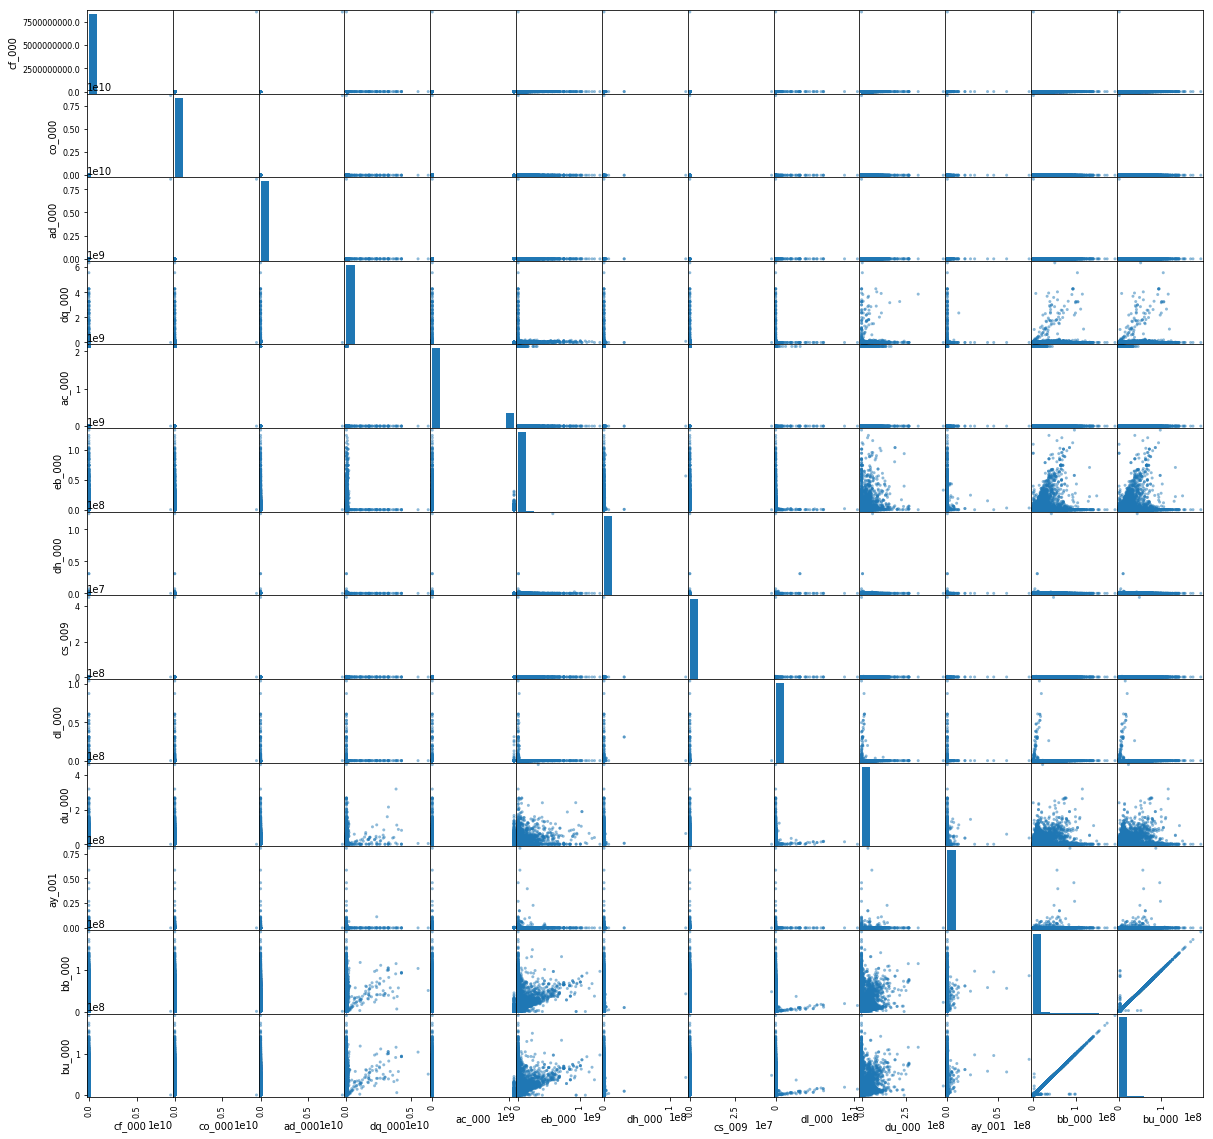

In [10]:
pd.scatter_matrix(scatter_plot_data, figsize=(20,20))
plt.show()

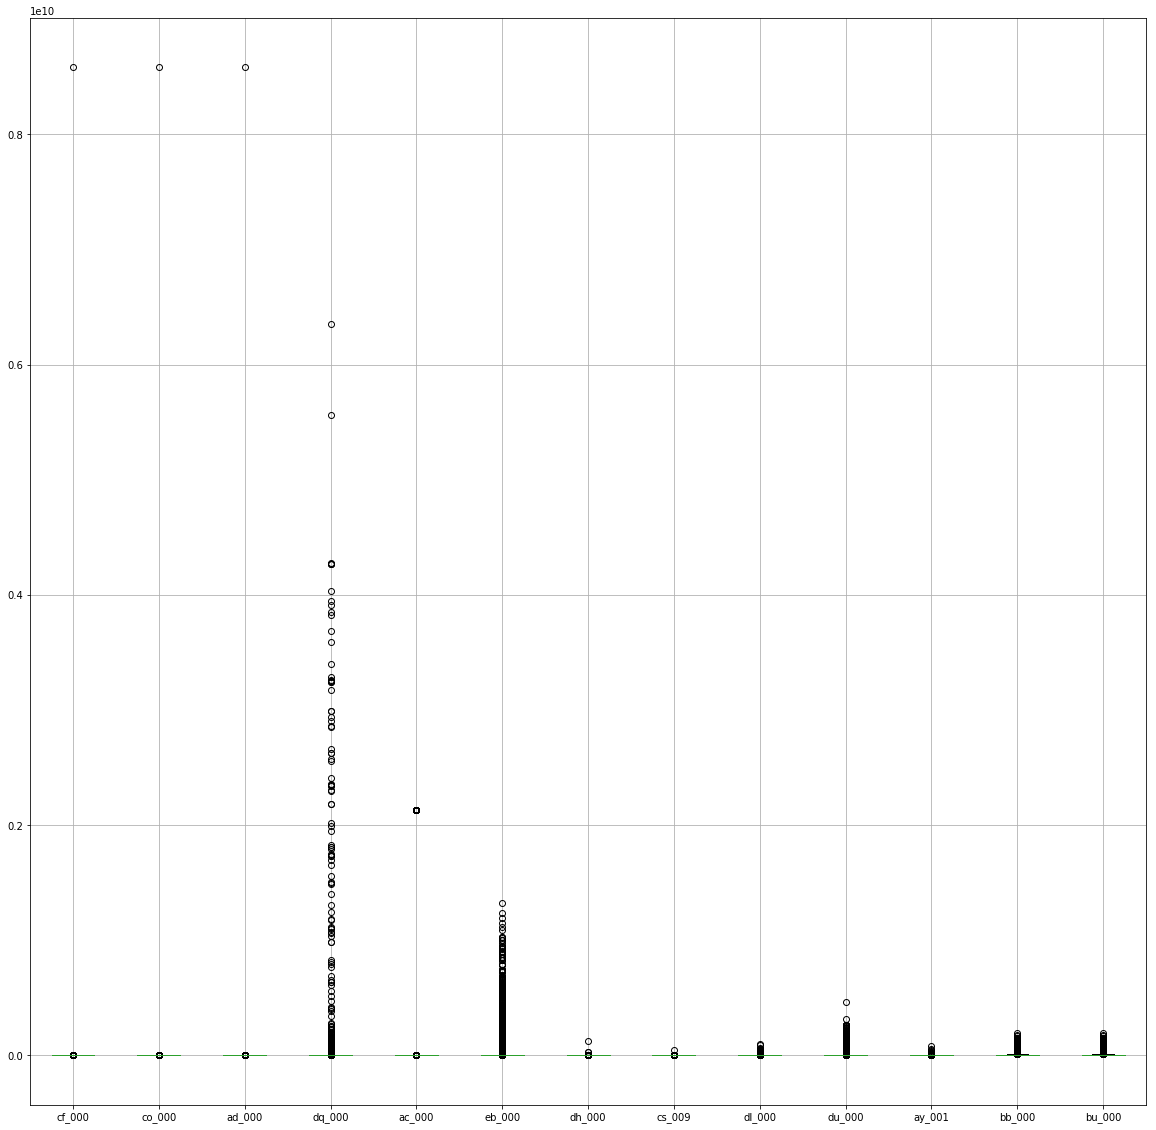

In [11]:
scatter_plot_data.boxplot(figsize=(20,20))

There might be some kind of linear relation between bb_000 and bu_000.

### From the data label value, we can see this data set is imbalanced

## c. random forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, roc_auc_score, auc

In [49]:
training_data_x_np = training_data_x.values
training_data_y_np = training_data_y.values
test_data_x_np = test_data_x.values
test_data_y_np = test_data_y.values

training_data_y_1D = list(training_data_y_np)
test_data_y_1D = list(test_data_y_np)

In [47]:
clf = RandomForestClassifier()
clf.fit(training_data_x_np, training_data_y_1D)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### training data

In [48]:
training_predict_y = clf.predict(training_data_x_np)

In [49]:
training_matrix = confusion_matrix(training_data_y_1D, training_predict_y)

[[58998     2]
 [   37   963]]


Text(0.5,0,'Predicted label')

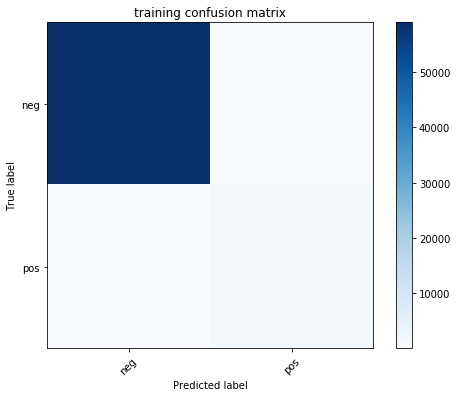

In [51]:
plt.figure(num=6, figsize=(8,6))
print(training_matrix)
plt.imshow(training_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('training confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [57]:
fpr_training, tpr_training, thresholds_training = roc_curve(training_data_y_1D, training_predict_y)
roc_auc = auc(fpr_training,tpr_training)

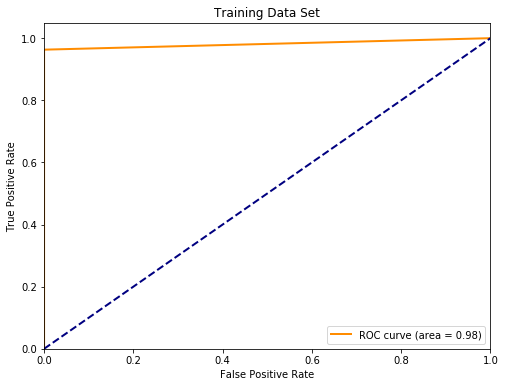

In [60]:
plt.figure(num=7, figsize=(8,6))
plt.plot(fpr_training, tpr_training, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data Set')
plt.legend(loc="lower right")
plt.show()

In [61]:
print("auc score")
roc_auc_score(training_data_y_1D, training_predict_y)

auc score


0.9814830508474577

In [67]:
print('training error')
training_error = 1 - clf.score(training_data_x_np, training_data_y_1D)
print('%0.5f' % training_error)

training error
0.00065


### test data:

In [68]:
test_predict_y = clf.predict(test_data_x_np)

In [69]:
test_matrix = confusion_matrix(test_data_y_1D, test_predict_y)

[[15603    22]
 [  128   247]]


Text(0.5,0,'Predicted label')

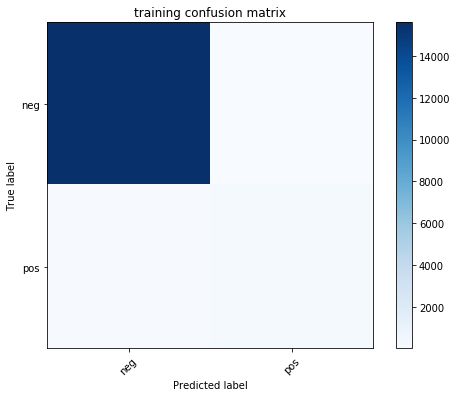

In [70]:
plt.figure(num=8, figsize=(8,6))
print(test_matrix)
plt.imshow(test_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('training confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [71]:
fpr_test, tpr_test, thresholds_test = roc_curve(test_data_y_1D, test_predict_y)
roc_auc_test = auc(fpr_test,tpr_test)

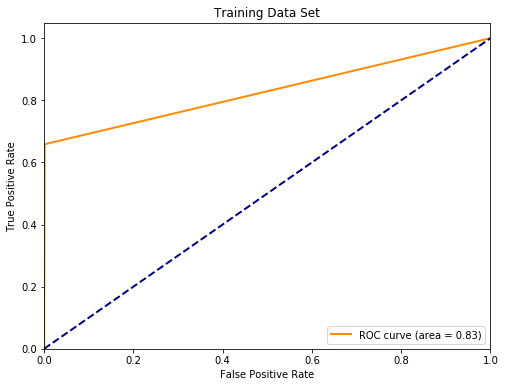

In [72]:
plt.figure(num=9, figsize=(8,6))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data Set')
plt.legend(loc="lower right")
plt.show()

In [73]:
print("auc score")
roc_auc_score(test_data_y_1D, test_predict_y)

auc score


0.8286293333333332

In [74]:
print('test error')
test_error = 1 - clf.score(test_data_x_np, test_data_y_1D)
print('%0.5f' % test_error)

test error
0.00938


### Out of Bag error

In [75]:
clf_oob = RandomForestClassifier(oob_score=True)
clf_oob.fit(training_data_x_np, training_data_y_1D)

d:\python\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [76]:
test_predict_y = clf_oob.predict(test_data_x_np)

In [77]:
oob_error = 1 - clf_oob.oob_score_

In [78]:
print('OOB error')
oob_error

OOB error


0.00921666666666665

It can be seen that OOB error is slightly lower than test error.

## d. Compensate for Class imbalance

In random forest, the method add a weight to the class. The weight can be calculated from the number of specific class.

In [79]:
clf_compensate_class_imbalance = RandomForestClassifier(class_weight="balanced")
clf_compensate_class_imbalance.fit(training_data_x_np, training_data_y_1D)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### training data set:

In [87]:
training_predict_y = clf_compensate_class_imbalance.predict(training_data_x_np)

In [88]:
training_matrix = confusion_matrix(training_data_y_1D, training_predict_y)

[[58998     2]
 [   44   956]]


Text(0.5,0,'Predicted label')

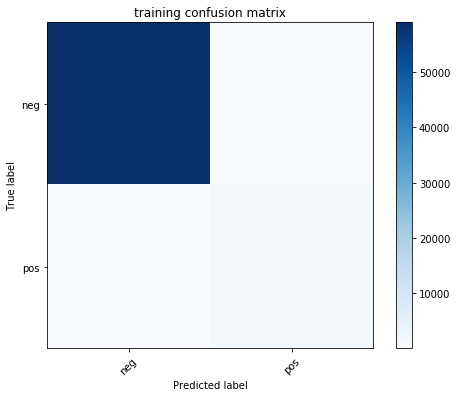

In [89]:
plt.figure(num=12, figsize=(8,6))
print(training_matrix)
plt.imshow(training_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('training confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [90]:
fpr_training, tpr_training, thresholds_training = roc_curve(training_data_y_1D, training_predict_y)
roc_auc = auc(fpr_training,tpr_training)

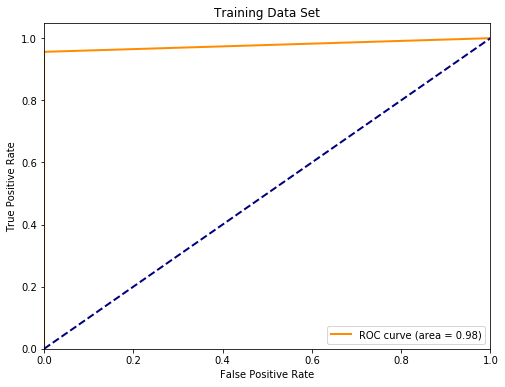

In [91]:
plt.figure(num=13, figsize=(8,6))
plt.plot(fpr_training, tpr_training, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Data Set')
plt.legend(loc="lower right")
plt.show()

In [92]:
print('training error')
training_error = 1 - clf_compensate_class_imbalance.score(training_data_x_np, training_data_y_1D)
print('%0.5f' % training_error)

training error
0.00077


### test data set:

In [80]:
test_predict_y = clf_compensate_class_imbalance.predict(test_data_x_np)

In [81]:
test_matrix_new = confusion_matrix(test_data_y_1D, test_predict_y)

[[15610    15]
 [  170   205]]


Text(0.5,0,'Predicted label')

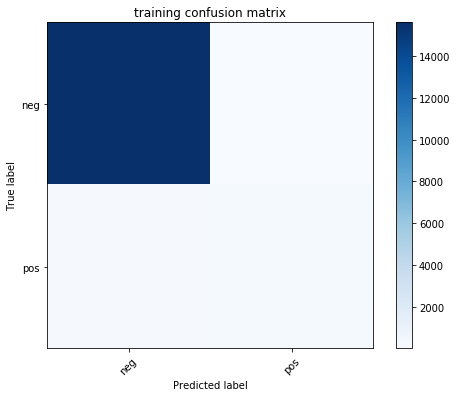

In [82]:
plt.figure(num=10, figsize=(8,6))
print(test_matrix_new)
plt.imshow(test_matrix_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('training confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [83]:
fpr_test, tpr_test, thresholds_test = roc_curve(test_data_y_1D, test_predict_y)
roc_auc_test = auc(fpr_test,tpr_test)

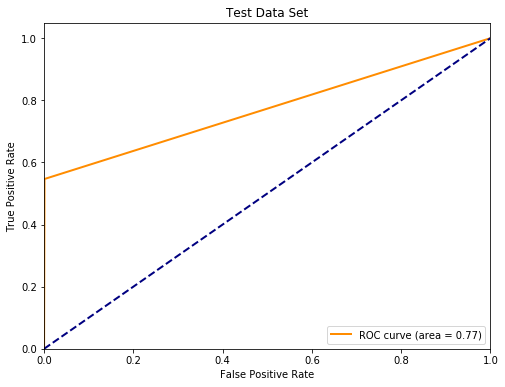

In [86]:
plt.figure(num=11, figsize=(8,6))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data Set')
plt.legend(loc="lower right")
plt.show()

In [85]:
print('test error')
test_error = 1 - clf_compensate_class_imbalance.score(test_data_x_np, test_data_y_1D)
print('%0.5f' % test_error)

test error
0.01156


Acctually, from the data prediction, we can see the weighted model has less Fasle-Positive but more Fasle-Negative. In conclusion, I would say the result before using weighted model is slightly better.

## e. Model Trees

In [2]:
import weka.core.jvm as jvm
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['d:\\python\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'd:\\python\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'd:\\python\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'd:\\python\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'd:\\python\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [3]:
from weka.classifiers import Classifier, Evaluation
from weka.plot.classifiers import plot_roc
from weka.core.converters import Loader
from weka.core.classes import Random

In [4]:
loader = Loader()
training_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/training_instances.arff')
test_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/testing_instances.arff')
test_instances.class_is_last()
training_instances.class_is_last()

In [5]:
tree_model = Classifier(classname='weka.classifiers.trees.LMT')
tree_model.build_classifier(training_instances)

In [6]:
evl_cross = Evaluation(training_instances)
evl_cross.crossvalidate_model(tree_model, training_instances, 10, Random(1))

training data set

In [7]:
print(evl_cross.percent_correct)
print(evl_cross.summary())
print(evl_cross.class_details())

99.20666666666666

Correctly Classified Instances       59524               99.2067 %
Incorrectly Classified Instances       476                0.7933 %
Kappa statistic                          0.7452
Mean absolute error                      0.0104
Root mean squared error                  0.0817
Relative absolute error                 31.6807 %
Root relative squared error             63.8146 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.289    0.995      0.997    0.996      0.746    0.952     0.997     0
                 0.711    0.003    0.792      0.711    0.749      0.746    0.952     0.749     1
Weighted Avg.    0.992    0.284    0.992      0.992    0.992      0.746    0.952     0.993     



DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('D:\\python\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('D:\\python\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


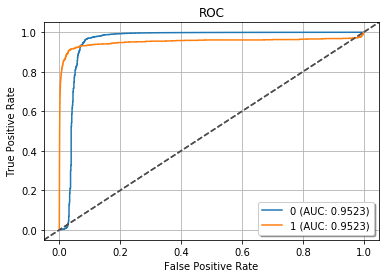

In [9]:
plot_roc(evl_cross, class_index=[0,1], wait=True)

test data set

In [15]:
evl_cross.crossvalidate_model(tree_model, test_instances, 5, Random(1))

In [16]:
print(evl_cross.percent_correct)
print(evl_cross.summary())
print(evl_cross.class_details())

99.11578947368422

Correctly Classified Instances       75328               99.1158 %
Incorrectly Classified Instances       672                0.8842 %
Kappa statistic                          0.7361
Mean absolute error                      0.0118
Root mean squared error                  0.0859
Relative absolute error                 33.0601 %
Root relative squared error             64.464  %
Total Number of Instances            76000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.303    0.994      0.997    0.996      0.738    0.955     0.997     0
                 0.697    0.003    0.789      0.697    0.741      0.738    0.955     0.745     1
Weighted Avg.    0.991    0.297    0.991      0.991    0.991      0.738    0.955     0.993     



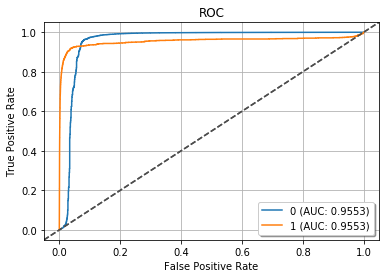

In [17]:
plot_roc(evl_cross, class_index=[0,1], wait=True)

## f. Using SMOTE handling imbalance

In [11]:
import weka.core.jvm as jvm
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['d:\\python\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'd:\\python\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'd:\\python\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'd:\\python\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'd:\\python\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [12]:
import weka.core.converters as converters
from weka.classifiers import Classifier, Evaluation
from weka.plot.classifiers import plot_roc
from weka.core.converters import Loader
from weka.core.classes import Random

In [13]:
loader = Loader()

In [23]:
test_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/testing_instances.arff')
test_instances.class_is_last()

do cross-validation for choosing k_neighbors in SMOTE:

k_neighbors = 1:

In [14]:
training_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/training_instances_sm1.arff')
training_instances.class_is_last()

In [15]:
tree_model = Classifier(classname='weka.classifiers.trees.LMT')
tree_model.build_classifier(training_instances)
evl_cross = Evaluation(training_instances)

98.72796610169492

Correctly Classified Instances      116499               98.728  %
Incorrectly Classified Instances      1501                1.272  %
Kappa statistic                          0.9746
Mean absolute error                      0.0201
Root mean squared error                  0.1046
Relative absolute error                  4.0201 %
Root relative squared error             20.9286 %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.985    0.011    0.989      0.985    0.987      0.975    0.995     0.995     0
                 0.989    0.015    0.986      0.989    0.987      0.975    0.995     0.992     1
Weighted Avg.    0.987    0.013    0.987      0.987    0.987      0.975    0.995     0.994     



DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('D:\\python\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


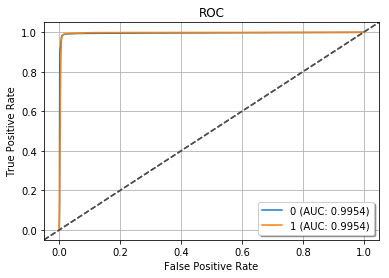

In [16]:
evl_cross.crossvalidate_model(tree_model, training_instances, 5, Random(1))
print(evl_cross.percent_correct)
print(evl_cross.summary())
print(evl_cross.class_details())
plot_roc(evl_cross, class_index=[0,1], wait=True)

K_neighbors = 3:

In [18]:
training_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/training_instances_sm3.arff')
training_instances.class_is_last()

98.44661016949152

Correctly Classified Instances      116167               98.4466 %
Incorrectly Classified Instances      1833                1.5534 %
Kappa statistic                          0.9689
Mean absolute error                      0.0268
Root mean squared error                  0.1152
Relative absolute error                  5.3559 %
Root relative squared error             23.0365 %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.983    0.014    0.986      0.983    0.984      0.969    0.996     0.996     0
                 0.986    0.017    0.983      0.986    0.984      0.969    0.996     0.994     1
Weighted Avg.    0.984    0.016    0.984      0.984    0.984      0.969    0.996     0.995     



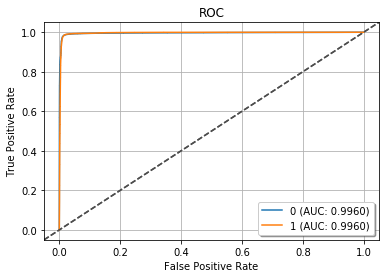

In [19]:
tree_model = Classifier(classname='weka.classifiers.trees.LMT')
tree_model.build_classifier(training_instances)
evl_cross = Evaluation(training_instances)
evl_cross.crossvalidate_model(tree_model, training_instances, 5, Random(1))
print(evl_cross.percent_correct)
print(evl_cross.summary())
print(evl_cross.class_details())
plot_roc(evl_cross, class_index=[0,1], wait=True)

K_neighbors = 5:

In [21]:
training_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/training_instances_sm5.arff')
training_instances.class_is_last()

98.37796610169491

Correctly Classified Instances      116086               98.378  %
Incorrectly Classified Instances      1914                1.622  %
Kappa statistic                          0.9676
Mean absolute error                      0.0274
Root mean squared error                  0.1166
Relative absolute error                  5.4792 %
Root relative squared error             23.3285 %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.983    0.015    0.985      0.983    0.984      0.968    0.996     0.995     0
                 0.985    0.017    0.983      0.985    0.984      0.968    0.996     0.994     1
Weighted Avg.    0.984    0.016    0.984      0.984    0.984      0.968    0.996     0.994     



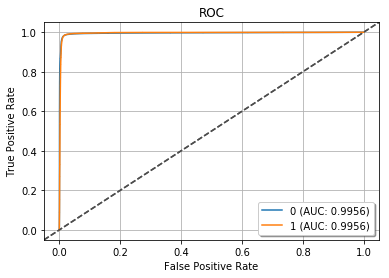

In [22]:
tree_model = Classifier(classname='weka.classifiers.trees.LMT')
tree_model.build_classifier(training_instances)
evl_cross = Evaluation(training_instances)
evl_cross.crossvalidate_model(tree_model, training_instances, 5, Random(1))
print(evl_cross.percent_correct)
print(evl_cross.summary())
print(evl_cross.class_details())
plot_roc(evl_cross, class_index=[0,1], wait=True)

In [42]:
test_predict_y = evl_cross.test_model(tree_model, test_instances)

In [51]:
test_matrix_new = confusion_matrix(test_data_y_1D, test_predict_y)

[[15362   263]
 [   55   320]]


Text(0.5,0,'Predicted label')

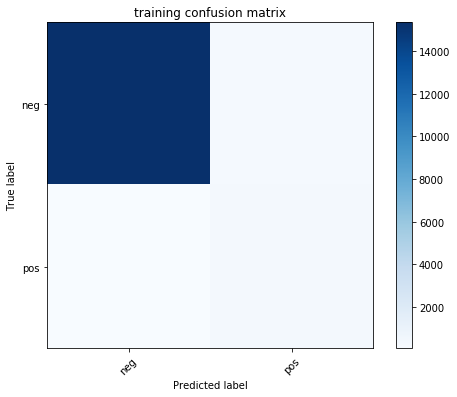

In [52]:
plt.figure(num=20, figsize=(8,6))
print(test_matrix_new)
plt.imshow(test_matrix_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('training confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [53]:
fpr_test, tpr_test, thresholds_test = roc_curve(test_data_y_1D, test_predict_y)
roc_auc_test = auc(fpr_test,tpr_test)

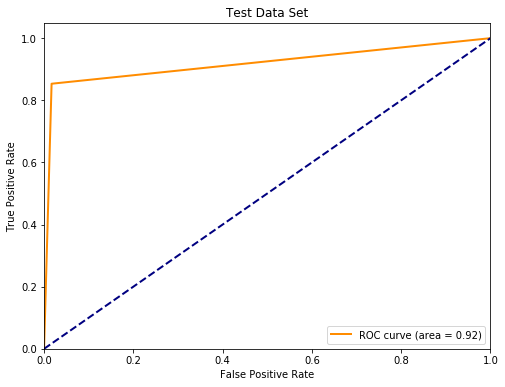

In [54]:
plt.figure(num=21, figsize=(8,6))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data Set')
plt.legend(loc="lower right")
plt.show()

K_neighbors = 8:

In [55]:
training_instances = loader.load_file('C:/Users/admin/Desktop/MachineLearning/Machine-Learning/HW/HW3/data/training_instances_sm8.arff')
training_instances.class_is_last()

98.84322033898304

Correctly Classified Instances      116635               98.8432 %
Incorrectly Classified Instances      1365                1.1568 %
Kappa statistic                          0.9769
Mean absolute error                      0.0188
Root mean squared error                  0.1003
Relative absolute error                  3.7501 %
Root relative squared error             20.0616 %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.985    0.008    0.992      0.985    0.988      0.977    0.996     0.996     0
                 0.992    0.015    0.985      0.992    0.988      0.977    0.996     0.993     1
Weighted Avg.    0.988    0.012    0.988      0.988    0.988      0.977    0.996     0.995     



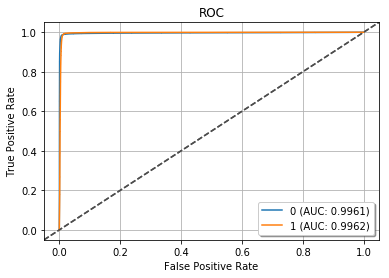

In [56]:
tree_model = Classifier(classname='weka.classifiers.trees.LMT')
tree_model.build_classifier(training_instances)
evl_cross = Evaluation(training_instances)
evl_cross.crossvalidate_model(tree_model, training_instances, 5, Random(1))
print(evl_cross.percent_correct)
print(evl_cross.summary())
print(evl_cross.class_details())
plot_roc(evl_cross, class_index=[0,1], wait=True)

[[58607   393]
 [   19   981]]


Text(0.5,0,'Predicted label')

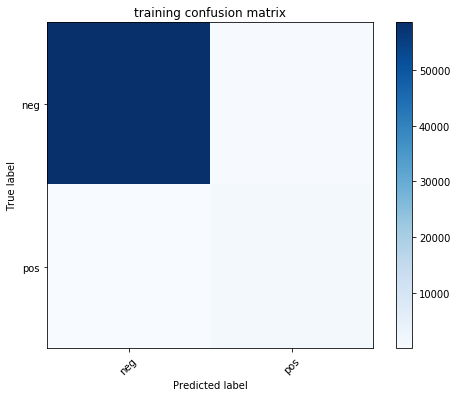

In [61]:
train_predict_y = evl_cross.test_model(tree_model, training_instances)
train_matrix_new = confusion_matrix(training_data_y_1D, train_predict_y)
plt.figure(num=24, figsize=(8,6))
print(train_matrix_new)
plt.imshow(train_matrix_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('training confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

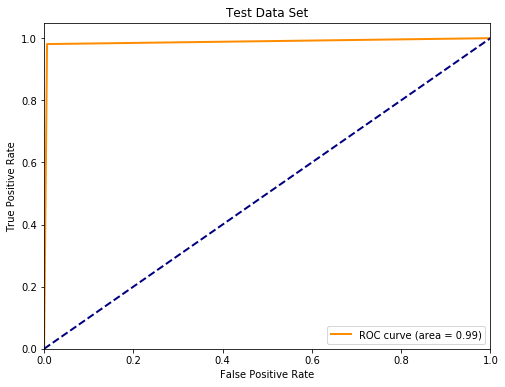

In [63]:
fpr_test, tpr_test, thresholds_test = roc_curve(training_data_y_1D, train_predict_y)
roc_auc_test = auc(fpr_test,tpr_test)
plt.figure(num=23, figsize=(8,6))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data Set')
plt.legend(loc="lower right")
plt.show()

[[15431   194]
 [   68   307]]


Text(0.5,0,'Predicted label')

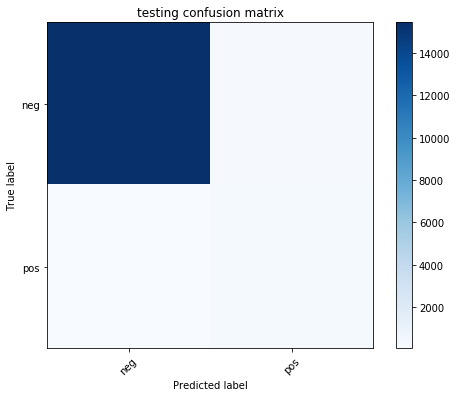

In [59]:
test_predict_y = evl_cross.test_model(tree_model, test_instances)
test_matrix_new = confusion_matrix(test_data_y_1D, test_predict_y)
plt.figure(num=22, figsize=(8,6))
print(test_matrix_new)
plt.imshow(test_matrix_new, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('testing confusion matrix')
plt.colorbar()
classes=["neg","pos"]
tick_marks=np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation=45)
plt.yticks(tick_marks,classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

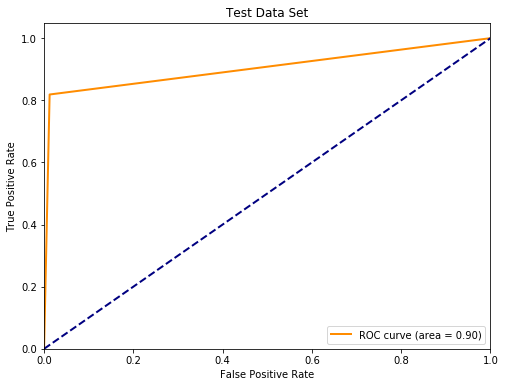

In [58]:
fpr_test, tpr_test, thresholds_test = roc_curve(test_data_y_1D, test_predict_y)
roc_auc_test = auc(fpr_test,tpr_test)
plt.figure(num=23, figsize=(8,6))
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data Set')
plt.legend(loc="lower right")
plt.show()

### conclusion:

It takes about 5 hours to build a model tree with a specific k_neighbor coefficient. As far as I have calculated, from the cross-validation result, the best k_neighbor is 8. The 5-folds cross validation error is 1.1568 %. The training error is 0.6870%. The test error is 1.6375%.